##MondayReplay: recognize sport video

In questo piccolo progetto mi propongo di riconoscere quali sono gli oggetti all'interno di un video GoPro in modo da:
- capire che sport stiamo praticando
- capire cosa c'è nella scena corrente


Per fare questo userò così come sta darkflow

In [2]:
import sys
# su mac:
#yolo_path="/Users/franz/Desktop/GNULINUX/darkflow/"
# su linux:
yolo_path="/home/franz/Sviluppo/darkflow"
sys.path.append(yolo_path)

from net.build import TFNet
yolo_config_path = yolo_path + "cfg/yolo.cfg"
yolo_load_path = yolo_path + "bin/yolo.weights"
yolo_threshold = 0.25

options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": yolo_threshold}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 269862452 bytes
Finished in 0.13828039169311523s


In [5]:
import cv2
imgcv = cv2.imread("test/img10017.jpg")
result = tfnet.return_predict(imgcv)
print(result)

[{'label': 'person', 'topleft': {'x': 97, 'y': 52}, 'confidence': 0.57673764, 'bottomright': {'x': 107, 'y': 79}}]


In [20]:
def jsontobbox(json_result_from_darkflow):
    box_list = []
    for element in json_result_from_darkflow:
        startx = np.int(element["topleft"]["x"])
        starty = np.int(element["topleft"]["y"])
        endx = np.int(element["bottomright"]["x"])
        endy = np.int(element["bottomright"]["y"])
        box_list.append(((startx, starty), (endx, endy)))
    return box_list

In [24]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=1):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [25]:
def process_image(image):
    hot_box_list = []
    # check if the colorspace has to be changed
    # run darknet on the image
    resultjson = tfnet.return_predict(image)
    hot_box_list = jsontobbox(resultjson)

    #heat = np.zeros_like(image[:,:,0]).astype(np.float)
    #heat = add_heat(heat,hot_box_list)
    #heat = apply_threshold(heat,0)
    #heatmap = np.clip(heat, 0, 255)
    #labels = label(heatmap)
    #draw_img = draw_labeled_bboxes(image, labels)
    
    draw_img=draw_boxes(image, hot_box_list)
    return draw_img

[{'label': 'person', 'topleft': {'x': 97, 'y': 52}, 'confidence': 0.57673764, 'bottomright': {'x': 107, 'y': 79}}]


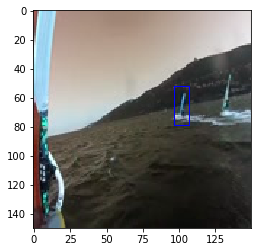

In [26]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image_with_boxes =process_image(imgcv)

imgplot = plt.imshow(image_with_boxes)


In [33]:
# You have to install moviepy via pip 
# You need ffmepeg installed

from moviepy.editor import VideoFileClip

print('Processing the video...')

out_dir='out/'
input_dir = 'test/'

#input_file='test_video.mp4'
input_file='video_share_640_windsurf_lizinian.mp4'

output_file=input_dir + out_dir+'processed_'+input_file
clip = VideoFileClip(input_dir+input_file)
out_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
out_clip.write_videofile(output_file, audio=False)

print("Done")

Processing the video...
[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.41205025, 'bottomright': {'x': 517, 'y': 359}}]
[MoviePy] >>>> Building video test/out/processed_video_share_640_windsurf_lizinian.mp4
[MoviePy] Writing video test/out/processed_video_share_640_windsurf_lizinian.mp4


  0%|          | 1/3727 [00:03<3:50:57,  3.72s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.41205025, 'bottomright': {'x': 517, 'y': 359}}]


  0%|          | 2/3727 [00:07<3:50:28,  3.71s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.41205025, 'bottomright': {'x': 517, 'y': 359}}]


  0%|          | 3/3727 [00:11<3:50:30,  3.71s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.40896368, 'bottomright': {'x': 517, 'y': 359}}]


  0%|          | 4/3727 [00:14<3:50:49,  3.72s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.41146222, 'bottomright': {'x': 516, 'y': 359}}]


  0%|          | 5/3727 [00:18<3:50:55,  3.72s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.41018873, 'bottomright': {'x': 516, 'y': 359}}]


  0%|          | 6/3727 [00:22<3:50:17,  3.71s/it]

[{'label': 'person', 'topleft': {'x': 144, 'y': 0}, 'confidence': 0.35334182, 'bottomright': {'x': 518, 'y': 359}}]


  0%|          | 7/3727 [00:25<3:50:02,  3.71s/it]

[{'label': 'person', 'topleft': {'x': 141, 'y': 0}, 'confidence': 0.31729585, 'bottomright': {'x': 523, 'y': 358}}]


  0%|          | 8/3727 [00:29<3:49:32,  3.70s/it]

[{'label': 'person', 'topleft': {'x': 186, 'y': 0}, 'confidence': 0.45454153, 'bottomright': {'x': 552, 'y': 352}}]


  0%|          | 9/3727 [00:33<3:48:55,  3.69s/it]

[]


  0%|          | 10/3727 [00:37<3:49:56,  3.71s/it]

[]


  0%|          | 11/3727 [00:40<3:48:39,  3.69s/it]

[]


  0%|          | 12/3727 [00:44<3:49:31,  3.71s/it]

[]


  0%|          | 13/3727 [00:48<3:58:26,  3.85s/it]

[]


  0%|          | 14/3727 [00:52<3:59:26,  3.87s/it]

[]


  0%|          | 15/3727 [00:56<3:55:46,  3.81s/it]

[]


  0%|          | 16/3727 [01:00<3:55:13,  3.80s/it]

[]


  0%|          | 17/3727 [01:03<3:53:09,  3.77s/it]

[{'label': 'stop sign', 'topleft': {'x': 91, 'y': 0}, 'confidence': 0.41439813, 'bottomright': {'x': 554, 'y': 359}}]


  0%|          | 18/3727 [01:07<3:51:35,  3.75s/it]

[{'label': 'stop sign', 'topleft': {'x': 116, 'y': 0}, 'confidence': 0.47532314, 'bottomright': {'x': 532, 'y': 359}}]


  1%|          | 19/3727 [01:11<3:53:04,  3.77s/it]

[{'label': 'mouse', 'topleft': {'x': 142, 'y': 0}, 'confidence': 0.35488731, 'bottomright': {'x': 510, 'y': 359}}, {'label': 'stop sign', 'topleft': {'x': 173, 'y': 0}, 'confidence': 0.34912789, 'bottomright': {'x': 541, 'y': 359}}]


  1%|          | 20/3727 [01:15<3:53:14,  3.78s/it]

[{'label': 'stop sign', 'topleft': {'x': 157, 'y': 7}, 'confidence': 0.75344276, 'bottomright': {'x': 501, 'y': 345}}]


  1%|          | 21/3727 [01:18<3:51:05,  3.74s/it]

[{'label': 'stop sign', 'topleft': {'x': 168, 'y': 16}, 'confidence': 0.77738398, 'bottomright': {'x': 493, 'y': 337}}]


  1%|          | 22/3727 [01:22<3:51:04,  3.74s/it]

[{'label': 'stop sign', 'topleft': {'x': 174, 'y': 19}, 'confidence': 0.78141057, 'bottomright': {'x': 488, 'y': 334}}]


  1%|          | 23/3727 [01:26<3:50:20,  3.73s/it]

[{'label': 'stop sign', 'topleft': {'x': 180, 'y': 24}, 'confidence': 0.69655621, 'bottomright': {'x': 483, 'y': 328}}]


  1%|          | 24/3727 [01:30<3:53:10,  3.78s/it]

[{'label': 'stop sign', 'topleft': {'x': 172, 'y': 25}, 'confidence': 0.62985855, 'bottomright': {'x': 488, 'y': 328}}]


  1%|          | 25/3727 [01:33<3:50:59,  3.74s/it]

[{'label': 'stop sign', 'topleft': {'x': 167, 'y': 28}, 'confidence': 0.77038425, 'bottomright': {'x': 484, 'y': 328}}]


  1%|          | 26/3727 [01:37<3:51:32,  3.75s/it]

[{'label': 'stop sign', 'topleft': {'x': 194, 'y': 39}, 'confidence': 0.74516708, 'bottomright': {'x': 474, 'y': 319}}]


  1%|          | 27/3727 [01:41<3:50:22,  3.74s/it]

[{'label': 'stop sign', 'topleft': {'x': 195, 'y': 39}, 'confidence': 0.74322641, 'bottomright': {'x': 469, 'y': 318}}]


  1%|          | 28/3727 [01:44<3:50:05,  3.73s/it]

[{'label': 'stop sign', 'topleft': {'x': 202, 'y': 46}, 'confidence': 0.66378868, 'bottomright': {'x': 459, 'y': 312}}]


  1%|          | 29/3727 [01:48<3:50:13,  3.74s/it]

[{'label': 'stop sign', 'topleft': {'x': 211, 'y': 49}, 'confidence': 0.5854845, 'bottomright': {'x': 450, 'y': 309}}]


  1%|          | 30/3727 [01:52<3:49:40,  3.73s/it]

[{'label': 'stop sign', 'topleft': {'x': 208, 'y': 53}, 'confidence': 0.48871362, 'bottomright': {'x': 447, 'y': 306}}]


  1%|          | 31/3727 [01:56<3:49:06,  3.72s/it]

[{'label': 'stop sign', 'topleft': {'x': 205, 'y': 51}, 'confidence': 0.51346511, 'bottomright': {'x': 451, 'y': 307}}]


  1%|          | 32/3727 [02:00<3:58:17,  3.87s/it]

[{'label': 'stop sign', 'topleft': {'x': 204, 'y': 47}, 'confidence': 0.48094496, 'bottomright': {'x': 445, 'y': 307}}]


  1%|          | 33/3727 [02:04<3:57:20,  3.86s/it]

[{'label': 'stop sign', 'topleft': {'x': 211, 'y': 49}, 'confidence': 0.40097409, 'bottomright': {'x': 442, 'y': 305}}]


  1%|          | 34/3727 [02:07<3:53:26,  3.79s/it]

[]


  1%|          | 35/3727 [02:11<3:56:32,  3.84s/it]

[]


  1%|          | 36/3727 [02:15<3:54:28,  3.81s/it]

[]


  1%|          | 37/3727 [02:19<3:55:04,  3.82s/it]

[]


  1%|          | 38/3727 [02:23<3:53:36,  3.80s/it]

[]


  1%|          | 39/3727 [02:26<3:52:30,  3.78s/it]

[]


  1%|          | 40/3727 [02:30<3:51:38,  3.77s/it]

[]


KeyboardInterrupt: 